In [1]:
import coremltools as ct
import numpy as npy
import PIL

import sys

try:
    import src
except:
    sys.path.append('../')
    import src

from src.transform import get_train_augmentations

import coremltools as ct
import numpy as np
import matplotlib.pyplot as plt
import PIL
import albumentations as A

scikit-learn version 1.3.1 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.


In [24]:
MODEL_PATH = "DeepLabV3Plus-mobileone_s3.mlpackage"

model = ct.models.MLModel(MODEL_PATH)
spec = model.get_spec()

(686, 686, 4)

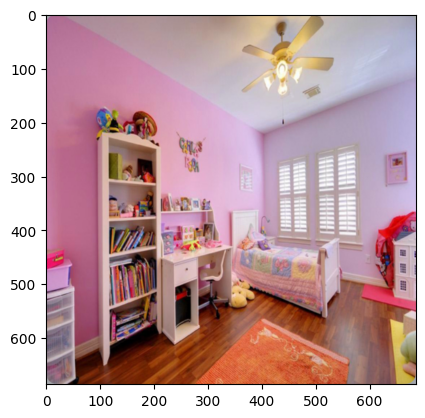

In [25]:
sample_image_path = '/Users/richardkuodis/Downloads/IMG_0184.PNG'
image = PIL.Image.open(sample_image_path)
image = np.asarray(image)
plt.imshow(image);
image.shape

In [26]:
img_width = spec.description.input[0].type.imageType.width
img_height = spec.description.input[0].type.imageType.height
img_width, img_height

(800, 800)

In [27]:
resize_image_fn = A.Compose([
    A.LongestMaxSize(max_size=min(img_width, img_height), interpolation=1),
    A.PadIfNeeded(
        min_height=img_height,
        min_width=img_width,
        border_mode=0
    ),
    A.PadIfNeeded(
        min_height=None,
        min_width=None,
        pad_width_divisor=32,
        pad_height_divisor=32,
        border_mode=0,
    ),
])

(800, 800, 4)

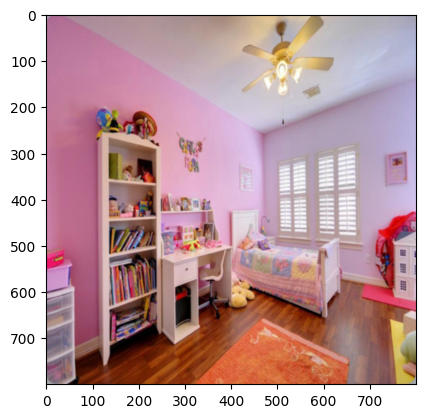

In [28]:
image_preprocessed = resize_image_fn(image=image)['image']
plt.imshow(image_preprocessed)
image_preprocessed.shape

In [29]:
input_name = spec.description.input[0].name
input_name

'input'

In [38]:
# input = PIL.Image.fromarray(image_preprocessed, 'RGB')
input = PIL.Image.open(sample_image_path).convert('RGB').resize((800, 800))
y = model.predict({input_name: input})

In [39]:
y.keys()

dict_keys(['output'])

(-0.5, 799.5, 799.5, -0.5)

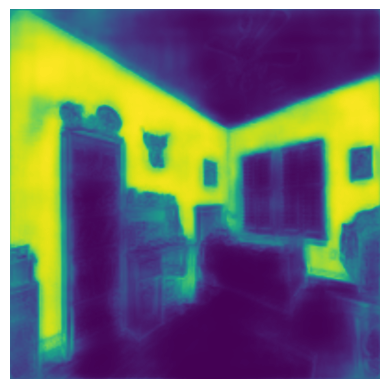

In [41]:
output = y['output']
plt.imshow(output);
plt.axis('off')

In [33]:
output.shape

(800, 800)

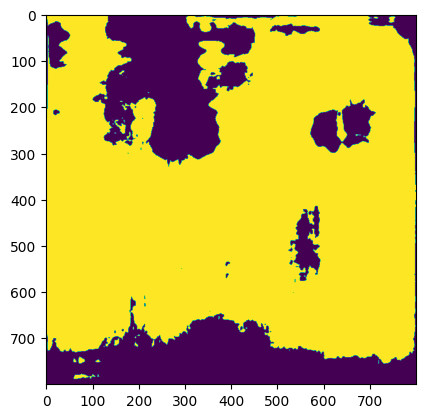

In [34]:
threshold = 0.5
mask = np.zeros_like(output)
mask[output>=threshold] = 255
mask[output<threshold] = 0
plt.imshow(mask);

In [33]:
output.min(), output.max()

(0.00050735474, 0.99316406)